# EDA (Exploratory Data Analysis)

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# loading data
df = pd.read_csv('data1_2.csv')
pd.DataFrame(df)

,Indikator,Tipe
0,"mendengarkan lagu,menonton film,dan membaca no...",I
1,tidur,I
2,Saya melakukan hobi saya seperti bermain gitar...,I
3,Waktu di rumah sendirian pas semua keluar ada ...,I
4,"rebahan, jalan-jalan",E
...,...,...
121,Saya biasanya menghabiskan waktu untuk mendapa...,I
122,Saya seorang atlet taekwondo yang menghabiskan...,I
123,Saya biasanya jalan jalan ke mall dengan teman...,E
124,saya akan menghabiskan waktu untuk mengasah sk...,I


In [ ]:
#  memeriksa missing value
df.isnull().sum()

Indikator    0
Tipe         0
dtype: int64

In [ ]:
df.describe(include=['object'])

,Indikator,Tipe
count,126,126
unique,126,2
top,"mendengarkan lagu,menonton film,dan membaca no...",I
freq,1,91


In [ ]:
total = df.groupby(['Tipe']).count()
total

,Indikator
Tipe,
E,35
I,91


In [ ]:
#Mencari kata terumum pada kolom indikator
from collections import Counter

words = list(df["Indikator"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(100)

[('saya', 84),
 ('dan', 65),
 ('dengan', 50),
 ('untuk', 48),
 ('atau', 34),
 ('mendengarkan', 33),
 ('yang', 31),
 ('waktu', 30),
 ('teman', 30),
 ('bermain', 28),
 ('biasanya', 27),
 ('di', 22),
 ('menonton', 22),
 ('seperti', 21),
 ('menghabiskan', 19),
 ('musik', 18),
 ('Saya', 15),
 ('mood', 15),
 ('film', 14),
 ('akan', 14),
 ('bersama', 13),
 ('mendapatkan', 13),
 ('ke', 13),
 ('membaca', 12),
 ('melakukan', 11),
 ('energi', 11),
 ('tidur', 10),
 ('ketenangan', 10),
 ('game', 10),
 ('diri', 10),
 ('hal', 10),
 ('cara', 10),
 ('keluar', 9),
 ('Bermain', 9),
 ('lagu', 9),
 ('mencari', 8),
 ('kesenangan', 8),
 ('jalan', 8),
 ('pergi', 8),
 ('melihat', 8),
 ('buku', 7),
 ('sendiri', 7),
 ('Biasanya', 7),
 ('kamar', 7),
 ('bisa', 7),
 ('makan', 7),
 ('musik,', 7),
 ('juga', 7),
 ('tidur,', 7),
 ('luang', 6),
 ('sambil', 6),
 ('mengembalikan', 6),
 ('lakukan', 6),
 ('agar', 6),
 ('hanya', 6),
 ('tempat', 6),
 ('membuat', 6),
 ('novel', 5),
 ('mengisi', 5),
 ('teman,', 5),
 ('ada', 5),

#Data Pre-processing

1. Case Folding
2. Data Cleansing
- Case folding
- Stripping
- Remove emoji
- Remove number
- Remove character
- Remove punctiation
- Remove single char
3. Tokenizing
4. Normalization
5. Filtering
6. Stemming

In [ ]:
# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
df['Indikator'] = df['Indikator'].str.lower()
pd.DataFrame(df['Indikator'])

,Indikator
0,"mendengarkan lagu,menonton film,dan membaca no..."
1,tidur
2,saya melakukan hobi saya seperti bermain gitar...
3,waktu di rumah sendirian pas semua keluar ada ...
4,"rebahan, jalan-jalan"
...,...
121,saya biasanya menghabiskan waktu untuk mendapa...
122,saya seorang atlet taekwondo yang menghabiskan...
123,saya biasanya jalan jalan ke mall dengan teman...
124,saya akan menghabiskan waktu untuk mengasah sk...


In [ ]:
# data cleansing
from IPython.utils import text
import string
import re #regex library

# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def data_clean(indikator) :
  #remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  #remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  #remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  #remove number
  indikator = re.sub(r"\d+", "", indikator)
  #remove punctuation
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  #remove whitespace leading & trailing
  indikator =  indikator.strip()
  #remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  #remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator
df['Indikator_clean'] = df['Indikator'].apply(data_clean)
  #NLTK word tokenize
def word_tokenize_wrapper(indikator) :
  return word_tokenize(indikator)

df['Indikator_tokens'] = df['Indikator_clean'].apply(word_tokenize_wrapper)

pd.DataFrame(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Indikator,Tipe,Indikator_clean,Indikator_tokens
0,"mendengarkan lagu,menonton film,dan membaca no...",I,mendengarkan lagumenonton filmdan membaca nove...,"[mendengarkan, lagumenonton, filmdan, membaca,..."
1,tidur,I,tidur,[tidur]
2,saya melakukan hobi saya seperti bermain gitar...,I,saya melakukan hobi saya seperti bermain gitar...,"[saya, melakukan, hobi, saya, seperti, bermain..."
3,waktu di rumah sendirian pas semua keluar ada ...,I,waktu di rumah sendirian pas semua keluar ada ...,"[waktu, di, rumah, sendirian, pas, semua, kelu..."
4,"rebahan, jalan-jalan",E,rebahan jalanjalan,"[rebahan, jalanjalan]"
...,...,...,...,...
121,saya biasanya menghabiskan waktu untuk mendapa...,I,saya biasanya menghabiskan waktu untuk mendapa...,"[saya, biasanya, menghabiskan, waktu, untuk, m..."
122,saya seorang atlet taekwondo yang menghabiskan...,I,saya seorang atlet taekwondo yang menghabiskan...,"[saya, seorang, atlet, taekwondo, yang, mengha..."
123,saya biasanya jalan jalan ke mall dengan teman...,E,saya biasanya jalan jalan ke mall dengan teman...,"[saya, biasanya, jalan, jalan, ke, mall, denga..."
124,saya akan menghabiskan waktu untuk mengasah sk...,I,saya akan menghabiskan waktu untuk mengasah sk...,"[saya, akan, menghabiskan, waktu, untuk, menga..."


In [ ]:
normalizad_word = pd.read_csv("normalisasi1.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['Indikator_normalized'] = df['Indikator_tokens'].apply(normalized_term)

df['Indikator_normalized'].head()

0    [mendengarkan, lagumenonton, filmdan, membaca,...
1                                              [tidur]
2    [saya, melakukan, hobi, saya, seperti, bermain...
3    [waktu, di, rumah, sendirian, pas, semua, kelu...
4                                [rebahan, jalanjalan]
Name: Indikator_normalized, dtype: object

In [ ]:
# # filtering
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')


# def stopword_removal (indikator):
#   filtering = stopwords.words('indonesian','english')
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
# df['indikator_filter'].head()

In [ ]:
# Membuat list stopword sesuai kebutuhan fitur berdasarkan most uninformative words
'''
Ketika ada PR yang harus diselesaikan malam ini, Tiba-tiba teman lamamu mengajak
kamu untuk bertemu (reuni,bermain, ngobrol). Bagaimana cara kamu menyikapinya? , ceritakan alasannya!
'''
stop_list = ["saya","akan","untuk","dan","dengan","yang","di","lalu","jika","secara","atau","waktu","biasanya"]

def stopword_removal (indikator):
  filtering = stop_list
  x = []
  data = []
  def my_func (x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func,indikator)
  for x in fit :
    data.append(x)
  return data

df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
df['indikator_filter']

0      [mendengarkan, lagumenonton, filmdan, membaca,...
1                                                [tidur]
2      [melakukan, hobi, seperti, bermain, gitar, tid...
3      [rumah, sendirian, pas, semua, keluar, ada, ac...
4                                  [rebahan, jalanjalan]
                             ...                        
121    [menghabiskan, mendapatkan, energi, istirahat,...
122    [seorang, atlet, taekwondo, menghabiskan, luan...
123    [jalan, jalan, ke, mall, teman, mendengar, kan...
124    [menghabiskan, mengasah, skill, bahasa, inggri...
125          [suka, menonton, film, mendengarkan, musik]
Name: indikator_filter, Length: 126, dtype: object

In [ ]:
# Stemming

!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

df['indikator_stemming'] = df['indikator_filter'].apply(stemming)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00
dengar lagumenonton filmdan baca novel atau buku
tidur
laku hobi seperti main gitar tidur isi energi main sama teman isi luang seperti jogging
rumah sendiri pas semua keluar ada acara keluar sendiri cari angin
rebah jalanjalan
main game ajar lalu bimbel olahraga
main sama teman dengar lagu
cari motivasi work out olahraga internet
main teman teman coba cafe baru
dapat energi seperti tenang senang taman pada malam hari
tidur baca buku serta dengar musik
tonton film
main sesuatu cari informasisesuatu tarik
main voli badminton renang larilari
jalan jalan sendiri seperti tonton mungkin main sama teman teman
cara paling mudah yaitu main game sambil resah diri hal sebut sudah cukup kembali energi
main game tonton series tvfilm
main game
keluar jalan jalan sendiri laku hobby
sering kali habis main handphone apabila mood sedang bagus laku olahraga
tenang telah temu banyak orang biasa laku ada kamar laku meditasi k

In [ ]:
#tokenize data stemming

 #NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

df['indikator_stemmed_tokens'] = df['indikator_stemming'].apply(stemmed_tokenizing)


In [ ]:
pd.DataFrame(df[['Indikator_normalized', 'indikator_filter', 'indikator_stemmed_tokens']])

,Indikator_normalized,indikator_filter,indikator_stemmed_tokens
0,"[mendengarkan, lagumenonton, filmdan, membaca,...","[mendengarkan, lagumenonton, filmdan, membaca,...","[dengar, lagumenonton, filmdan, baca, novel, a..."
1,[tidur],[tidur],[tidur]
2,"[saya, melakukan, hobi, saya, seperti, bermain...","[melakukan, hobi, seperti, bermain, gitar, tid...","[laku, hobi, seperti, main, gitar, tidur, isi,..."
3,"[waktu, di, rumah, sendirian, pas, semua, kelu...","[rumah, sendirian, pas, semua, keluar, ada, ac...","[rumah, sendiri, pas, semua, keluar, ada, acar..."
4,"[rebahan, jalanjalan]","[rebahan, jalanjalan]","[rebah, jalanjalan]"
...,...,...,...
121,"[saya, biasanya, menghabiskan, waktu, untuk, m...","[menghabiskan, mendapatkan, energi, istirahat,...","[habis, dapat, energi, istirahat, rebah, diri,..."
122,"[saya, seorang, atlet, taekwondo, yang, mengha...","[seorang, atlet, taekwondo, menghabiskan, luan...","[orang, atlet, taekwondo, habis, luang, latih,..."
123,"[saya, biasanya, jalan, jalan, ke, mall, denga...","[jalan, jalan, ke, mall, teman, mendengar, kan...","[jalan, jalan, ke, mall, teman, dengar, kan, m..."
124,"[saya, akan, menghabiskan, waktu, untuk, menga...","[menghabiskan, mengasah, skill, bahasa, inggri...","[habis, asah, skill, bahasa, inggris, bisa, to..."


In [ ]:
df.head()

,Indikator,Tipe,Indikator_clean,Indikator_tokens,Indikator_normalized,indikator_filter,indikator_stemming,indikator_stemmed_tokens
0,"mendengarkan lagu,menonton film,dan membaca no...",I,mendengarkan lagumenonton filmdan membaca nove...,"[mendengarkan, lagumenonton, filmdan, membaca,...","[mendengarkan, lagumenonton, filmdan, membaca,...","[mendengarkan, lagumenonton, filmdan, membaca,...",dengar lagumenonton filmdan baca novel atau buku,"[dengar, lagumenonton, filmdan, baca, novel, a..."
1,tidur,I,tidur,[tidur],[tidur],[tidur],tidur,[tidur]
2,saya melakukan hobi saya seperti bermain gitar...,I,saya melakukan hobi saya seperti bermain gitar...,"[saya, melakukan, hobi, saya, seperti, bermain...","[saya, melakukan, hobi, saya, seperti, bermain...","[melakukan, hobi, seperti, bermain, gitar, tid...",laku hobi seperti main gitar tidur isi energi ...,"[laku, hobi, seperti, main, gitar, tidur, isi,..."
3,waktu di rumah sendirian pas semua keluar ada ...,I,waktu di rumah sendirian pas semua keluar ada ...,"[waktu, di, rumah, sendirian, pas, semua, kelu...","[waktu, di, rumah, sendirian, pas, semua, kelu...","[rumah, sendirian, pas, semua, keluar, ada, ac...",rumah sendiri pas semua keluar ada acara kelua...,"[rumah, sendiri, pas, semua, keluar, ada, acar..."
4,"rebahan, jalan-jalan",E,rebahan jalanjalan,"[rebahan, jalanjalan]","[rebahan, jalanjalan]","[rebahan, jalanjalan]",rebah jalanjalan,"[rebah, jalanjalan]"


# Feature extraction

In [ ]:
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
data_clean = df.astype({'Tipe' : 'category'})
data_clean = df.astype({'indikator_stemmed_tokens' : 'string'})
data_clean.dtypes

Indikator                           object
Tipe                                object
Indikator_clean                     object
Indikator_tokens                    object
Indikator_normalized                object
indikator_filter                    object
indikator_stemming                  object
indikator_stemmed_tokens    string[python]
dtype: object

In [ ]:
#  memeriksa missing value
df.isnull().any()

Indikator                   False
Tipe                        False
Indikator_clean             False
Indikator_tokens            False
Indikator_normalized        False
indikator_filter            False
indikator_stemming          False
indikator_stemmed_tokens    False
dtype: bool

In [ ]:
# Missing value handling

for idx in data_clean.index:
 if(len(data_clean["indikator_stemming"][idx]) == 0):
  data_clean = data_clean.drop(index=idx)

In [ ]:
# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan pembobotan TF-IDF pada kolom "indikator"
X = tfidf_vectorizer.fit_transform(data_clean['indikator_stemmed_tokens'])


In [ ]:
len(data_clean)

126

In [ ]:
# encoding label
enc = LabelEncoder()
data_clean['type of encoding'] = enc.fit_transform(data_clean['Tipe'])

y = data_clean['type of encoding']

# Splitting Data

In [ ]:
# Splitting data package
from sklearn.model_selection import train_test_split

In [ ]:
if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [ ]:
pd.DataFrame(X,y)

,0
type of encoding,
1,"(0, 61)\t0.3406896679324823\n (0, 22)\t0.41..."
1,"(0, 388)\t1.0"
1,"(0, 156)\t0.27631407331841146\n (0, 220)\t0..."
1,"(0, 14)\t0.3010838133651967\n (0, 66)\t0.22..."
0,"(0, 152)\t0.6658083041219292\n (0, 306)\t0...."
...,...
1,"(0, 271)\t0.42404025887557334\n (0, 57)\t0...."
1,"(0, 46)\t0.2617366270492507\n (0, 212)\t0.2..."
0,"(0, 165)\t0.45504007278883807\n (0, 228)\t0..."


In [ ]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12, shuffle=True)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(94, 422) (94,) (32, 422) (32,)


# Train Model & Selecting Model

In [ ]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline

accuracies = {

}

f1_scores = {

}

#Random Forest
random_forest = RandomForestClassifier()#n_estimators=100, random_state = 7)
# fit the model
random_forest.fit(X_train, y_train)
# train score
train_score = random_forest.score(X_train, y_train)
# test score
test_score = random_forest.score(X_test,y_test)
# predict
Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(random_forest, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Random Forest'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

# print("Accuracy: %.2f%%" % (predict_score * 100.0))

In [ ]:
random_forest.score(X_train,y_train),random_forest.score(X_test, y_test)

(1.0, 0.90625)

In [ ]:
#XG boost Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test,y_test)
Y_pred = xgb.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(xgb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['XG Boost'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
xgb.score(X_train,y_train),xgb.score(X_test, y_test)

(0.9680851063829787, 0.8125)

In [ ]:
#Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

train_score = sgd.score(X_train, y_train)
test_score = sgd.score(X_test,y_test)
Y_pred = sgd.predict(X_test)
predictions = [round(value) for value in Y_pred]

#Metric evaluation
#cv scores
cv_scores = cross_val_score(sgd, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SGD'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

In [ ]:
sgd.score(X_train,y_train),sgd.score(X_test, y_test)

(1.0, 0.9375)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test,y_test)
Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(logreg, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Logreg'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
logreg.score(X_train,y_train),logreg.score(X_test, y_test)

(0.8404255319148937, 0.84375)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test,y_test)
Y_Pred = knn.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(knn, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['KNN'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
knn.score(X_train,y_train),knn.score(X_test, y_test)

(0.8723404255319149, 0.9375)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test,y_test)
Y_pred = svm.predict(X_test)

# Metric evaluation
#cv scores
cv_scores = cross_val_score(svm, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SVM'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
svm.score(X_train,y_train),svm.score(X_test, y_test)

(1.0, 0.875)

In [ ]:
# Naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB().fit(X_train, y_train)

# evaluate score
train_score = mnb.score(X_train, y_train)

test_score = mnb.score(X_test,y_test)

Y_pred = svm.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(mnb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['MNB'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
mnb.score(X_train,y_train),xgb.score(X_test, y_test)

(0.8723404255319149, 0.8125)

In [ ]:
pd.DataFrame.from_dict(f1_scores, orient='index', columns=['CV f1-Scores']).sort_values(by='CV f1-Scores',ascending=False)

,CV f1-Scores
SGD,85.73
Random Forest,84.97
XG Boost,84.06
KNN,79.54
SVM,69.86
MNB,68.04
Logreg,60.70


In [ ]:
y_test.value_counts()

type of encoding
1    23
0     9
Name: count, dtype: int64

In [ ]:
pd.DataFrame(data_clean[['Tipe','type of encoding']])

,Tipe,type of encoding
0,I,1
1,I,1
2,I,1
3,I,1
4,E,0
...,...,...
121,I,1
122,I,1
123,E,0
124,I,1


# Model Improvement

In [ ]:
from sklearn.model_selection import GridSearchCV

# **Gradient Descent Hyperparameter Tuning**

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    "loss" : ['hinge','log_loss','modified_huber','perceptron','squared_error','squared_hinge','huber','psilon_insensitive','squared_psilon_insensitive'],
    "penalty" : ['l2','l1','elasticnet',None],
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0],
    "max_iter" : np.arange(0, 1000, 100),
}

sgd_improve = SGDClassifier()
sgd_improve_model = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
sgd_improve_model.fit(X, y)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_model.best_params_)
print("Skor terbaik:", sgd_improve_model.best_score_)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits
Hyperparameter terbaik: {'alpha': 0.0001, 'loss': 'modified_huber', 'max_iter': 700, 'penalty': 'elasticnet'}
Skor terbaik: 0.9000944162659466


In [ ]:
sgd = SGDClassifier(alpha =  0.01, loss = 'perceptron', max_iter = 800, penalty = None)
sgd.fit(X_train,y_train)


SGDClassifier(alpha=0.01, loss='perceptron', max_iter=800, penalty=None)

In [ ]:
# get a prediction
y_hat = sgd.predict(X_train)
y_sgd = sgd.predict(X_test)

In [ ]:
# from sklearn.metrics as metrics import accuracy_score,precision_score, recall_score, f1_score
import sklearn.metrics as metrics

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat)*100)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_sgd) * 100)
print('Test set f1-score: ',metrics.f1_score(y_test, y_sgd) * 100)
print('Test set precision: ',metrics.precision_score(y_test, y_sgd) * 100)
print('Test set recall: ',metrics.recall_score(y_test, y_sgd) * 100)

Training set accuracy:  100.0
Test set accuracy:  84.375
Test set f1-score:  89.36170212765957
Test set precision:  87.5
Test set recall:  91.30434782608695


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_sgd))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.88      0.91      0.89        23

    accuracy                           0.84        32
   macro avg       0.81      0.79      0.80        32
weighted avg       0.84      0.84      0.84        32



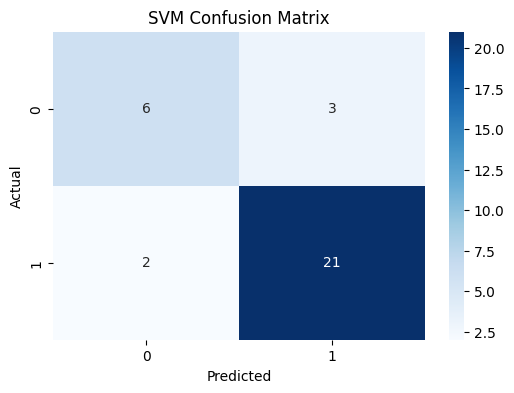

True Positives: 21
True Negatives: 6
False Positives: 2
False Negatives: 3


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_sgd)

# Mendapatkan nilai True Positive, True Negative, False Positive, False Negative dari confusion matrix
TN = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]
TP = conf_matrix[1][1]

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Menampilkan nilai True Positive, True Negative, False Positive, False Negative
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Predict Testing

In [ ]:
list_indikator = np.array(data_clean['indikator_stemmed_tokens'])
list_tipe = np.array(data_clean['type of encoding'])

In [ ]:
cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(list_indikator)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

In [ ]:
# Posts in tf-idf representation
X = X_tfidf

In [ ]:
X.shape

(126, 185)

In [ ]:
'''
Dataset baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
result = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model = LogisticRegression(C = 0.001, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
# model.fit(X_train,y_train)
model.fit(X_train_sm, y_train_sm)

y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])


In [ ]:
if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)



menolak nya, karena harus segera dikumpulkan 
The result is :  J


In [ ]:
y_test.value_counts()


In [ ]:
data_clean['Tipe'].value_counts()

# Saving model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

X = joblib.load('X_T3.sav')
y = joblib.load('y_T3.sav')

cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

'''
Dataset Baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

result = []

sm = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model = LogisticRegression(C = 0.001, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
model.fit(X_train_sm, y_train_sm)

joblib.dump(model,'clf_T3.sav')

y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])

if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)




menolak nya, karena harus segera dikumpulkan 
The result is :  J


# Load Model

In [ ]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

X = joblib.load('X_T3.sav')
y = joblib.load('y_T3.sav')

cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

'''
dataset Baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
# user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J
# user_input = "Saya akan mengatakan bahwasannya ingin menyelesaikan PR saya terlebih dahulu, dan akan menyusul apabila sudah selesai mengerjakannya." #J
# user_input = "Saya akan menyelesaikan terlebih dahulu tugas saya lalu menerima ajakan teman saya.. walau pertemuannya diundur beberapa jam." #J
# user_input = "Jika saya terganggu, saya akan minta maaf dan meminta waktu kepada dia agar saya bisa menyelesaikan tugas saya" #J
# user_input = "Saya akan menolaknya,karena ada tugas yang harus saya selesaikan hari itu juga" #J
# user_input = "Saya akan menolaknya dengan halus ataupun jika dia memaksa kemungkinan saya akan membawa PR saya di tempat tersebut lalu saya akan mengerjakan pr saya disana sembari mengobrol agar tidak terlalu suntuk mengerjakannya sendiri" #P

#P = 7 || N = 3

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

result = []
model = joblib.load('clf_T3.sav')
y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])

if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)

Saya akan menolaknya dengan halus ataupun jika dia memaksa kemungkinan saya akan membawa PR saya di tempat tersebut lalu saya akan mengerjakan pr saya disana sembari mengobrol agar tidak terlalu suntuk mengerjakannya sendiri
The result is :  J


# SGD SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    "loss" : ['hinge','log_loss','modified_huber','perceptron','squared_error','squared_hinge','huber','psilon_insensitive','squared_psilon_insensitive'],
    "penalty" : ['l2','l1','elasticnet',None],
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0],
    "max_iter" : np.arange(0, 1000, 100),
}

sgd_improve = SGDClassifier()
sgd_improve_model = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
sgd_improve_model.fit(X_sm, y_sm)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_model.best_params_)
print("Skor terbaik:", sgd_improve_model.best_score_)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits
Hyperparameter terbaik: {'alpha': 0.1, 'loss': 'perceptron', 'max_iter': 300, 'penalty': 'l2'}
Skor terbaik: 0.9836879432624113


In [ ]:
knn = KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=5, p=2, weights='uniform')
knn.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(leaf_size=1)

In [ ]:
# get a prediction
y_hat = knn.predict(X_train_sm)
y_knn = knn.predict(X_test)

In [ ]:
# from sklearn.metrics as metrics import accuracy_score,precision_score, recall_score, f1_score
import sklearn.metrics as metrics

print('Training set accuracy: ', metrics.accuracy_score(y_train_sm, y_hat)*100)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn) * 100)
print('Test set f1-score: ',metrics.f1_score(y_test, y_knn) * 100)
print('Test set precision: ',metrics.precision_score(y_test, y_knn) * 100)
print('Test set recall: ',metrics.recall_score(y_test, y_knn) * 100)

Training set accuracy:  85.48387096774194
Test set accuracy:  65.625
Test set f1-score:  70.27027027027026
Test set precision:  81.25
Test set recall:  61.904761904761905


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.50      0.73      0.59        11
           1       0.81      0.62      0.70        21

    accuracy                           0.66        32
   macro avg       0.66      0.67      0.65        32
weighted avg       0.71      0.66      0.66        32



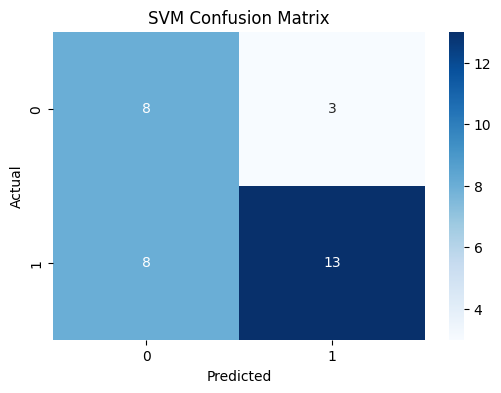

True Positives: 13
True Negatives: 8
False Positives: 8
False Negatives: 3


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_knn)

# Mendapatkan nilai True Positive, True Negative, False Positive, False Negative dari confusion matrix
TN = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]
TP = conf_matrix[1][1]

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Menampilkan nilai True Positive, True Negative, False Positive, False Negative
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# SGD ADS

In [ ]:
from imblearn.over_sampling import ADASYN

ads = ADASYN()

X_ads, y_ads = ads.fit_resample(X, y)

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    "loss" : ['hinge','log_loss','modified_huber','perceptron','squared_error','squared_hinge','huber','psilon_insensitive','squared_psilon_insensitive'],
    "penalty" : ['l2','l1','elasticnet',None],
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0],
    "max_iter" : np.arange(0, 1000, 100),
}

sgd_improve = SGDClassifier()
sgd_improve_model = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
sgd_improve_model.fit(X_ads, y_ads)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_model.best_params_)
print("Skor terbaik:", sgd_improve_model.best_score_)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits
Hyperparameter terbaik: {'alpha': 0.001, 'loss': 'huber', 'max_iter': 400, 'penalty': 'l2'}
Skor terbaik: 0.983626008542952


# SGD TL

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

X_tl, y_tl = tl.fit_resample(X, y)

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    "loss" : ['hinge','log_loss','modified_huber','perceptron','squared_error','squared_hinge','huber','psilon_insensitive','squared_psilon_insensitive'],
    "penalty" : ['l2','l1','elasticnet',None],
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0],
    "max_iter" : np.arange(0, 1000, 100),
}

sgd_improve = SGDClassifier()
sgd_improve_model = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
sgd_improve_model.fit(X_tl, y_tl)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_model.best_params_)
print("Skor terbaik:", sgd_improve_model.best_score_)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits
Hyperparameter terbaik: {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 200, 'penalty': 'l1'}
Skor terbaik: 0.8963212431904615


# SGD RUS

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    "loss" : ['hinge','log_loss','modified_huber','perceptron','squared_error','squared_hinge','huber','psilon_insensitive','squared_psilon_insensitive'],
    "penalty" : ['l2','l1','elasticnet',None],
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0],
    "max_iter" : np.arange(0, 1000, 100),
}

sgd_improve = SGDClassifier()
sgd_improve_model = GridSearchCV(sgd_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
sgd_improve_model.fit(X_rus, y_rus)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", sgd_improve_model.best_params_)
print("Skor terbaik:", sgd_improve_model.best_score_)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits
Hyperparameter terbaik: {'alpha': 0.01, 'loss': 'huber', 'max_iter': 300, 'penalty': 'l2'}
Skor terbaik: 0.8975748194014448


# Saving prepro

In [ ]:
# diimport dulu terrr semua depedencies nya terr
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
# prepro depedencies
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# data cleansing
from IPython.utils import text
import string
import re #regex library
# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# model algorithm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# # load data
# data = pd.read_csv('A2.csv')

# # preprocessing the data -> cleanse the data & convert feature dtype as a vector/numbers yagesya biar bisa dipahami sama mesinnya brok.
# data['Indikator'] = data['Indikator'].str.lower()
# pd.DataFrame(data['Indikator'])

# def data_clean(indikator) :
#   #remove tab. new line, and back slice
#   indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
#   #remove non ASCII (emoticon,dll)
#   indikator = indikator.encode('ascii', 'replace').decode('ascii')
#   #remove mention, link, hashtag
#   indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
#   #remove number
#   indikator = re.sub(r"\d+", "", indikator)
#   #remove punctuation
#   indikator = indikator.translate(str.maketrans("","",string.punctuation))
#   #remove whitespace leading & trailing
#   indikator =  indikator.strip()
#   #remove multiple white spacew into single white space
#   indikator = re.sub('\s+', ' ', indikator)
#   #remove single char
#   indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

#   return indikator
# data['Indikator_clean'] = data['Indikator'].apply(data_clean)
#   #NLTK word tokenize
# def word_tokenize_wrapper(indikator) :
#   return word_tokenize(indikator)

# data['Indikator_tokens'] = data['Indikator_clean'].apply(word_tokenize_wrapper)

# normalizad_word = pd.read_csv("normalisasi1.csv")

# normalizad_word_dict = {}

# for index, row in normalizad_word.iterrows():
#     if row[0] not in normalizad_word_dict:
#         normalizad_word_dict[row[0]] = row[1]

# def normalized_term(document):
#     return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# data['Indikator_normalized'] = data['Indikator_tokens'].apply(normalized_term)

# # filtering
# stop_list = ["saya","akan","untuk","dan","dengan","yang","di","lalu","jika","secara","atau","waktu","biasanya"]

# def stopword_removal (indikator):
#   filtering = stop_list
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# data['indikator_filter'] = data['Indikator_normalized'].apply(stopword_removal)

# # Stemming
# def stemming(indikator) :
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()

#   do = []
#   for w in indikator :
#     dt = stemmer.stem(w)
#     do.append(dt)

#   data_clean = []
#   d_clean = " ".join(do)
#   print(d_clean)
#   return d_clean

# data['indikator_stemming'] = data['indikator_filter'].apply(stemming)

# #tokenize data stemming - NLTK word tokenize
# def stemmed_tokenizing(indikator) :
#   return word_tokenize(indikator)

# data['indikator_stemmed_tokens'] = data['indikator_stemming'].apply(stemmed_tokenizing)

# data_clean = data.astype({'Tipe' : 'category'})
# data_clean = data.astype({'indikator_stemmed_tokens' : 'string'})

# X = data_clean['indikator_stemmed_tokens']
# y = data_clean['Tipe']

# list_indikator = np.array(X)
# list_tipe = np.array(y)
# enc = LabelEncoder()
# list_tipe = enc.fit_transform(list_tipe)

# # Saving X
# !pip install joblib
# import joblib
# joblib.dump(list_indikator, 'X_E2.sav')

# # Saving y encode
# joblib.dump(list_tipe, 'y_E2.sav')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# eval

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
import joblib
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler


# Load data X and y
X = joblib.load('X_E2.sav')
y = joblib.load('y_E2.sav')

# Initialize and fit CountVectorizer and TfidfTransformer
cntizer = CountVectorizer(analyzer="word", max_features=1000, min_df=0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf = tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

# Load new data for prediction
dt = pd.read_csv('A2.csv')
df_tes = dt['Indikator']
label = dt['Tipe']

# Transform the new data
my_X_cnt = cntizer.transform(df_tes.values.astype('U'))
my_X_tfidf = tfizer.transform(my_X_cnt).toarray()

# Initialize the result list
result = []
ads = ADASYN()
X_ads, y_ads = ads.fit_resample(X,y)

# Train the model
model = SGDClassifier(alpha=0.001, loss='huber', max_iter=400, penalty='l2')
model.fit(X_ads, y_ads)

# Save the model
joblib.dump(model, 'clf_E2.sav')

# Predict the new data
y_pred = model.predict(my_X_tfidf)

# Convert predictions to 'E' or 'I'
for pred in y_pred:
    if pred == 0:
        result.append('E')
    else:
        result.append('I')

# Display the predictions
for i, res in enumerate(result):
    print(f"Data {i+1}: Prediksi = {res}")


Data 1: Prediksi = E
Data 2: Prediksi = E
Data 3: Prediksi = I
Data 4: Prediksi = E
Data 5: Prediksi = I
Data 6: Prediksi = I
Data 7: Prediksi = I
Data 8: Prediksi = I
Data 9: Prediksi = I
Data 10: Prediksi = I


In [ ]:
pd.DataFrame(label)

,Tipe
0,E
1,E
2,I
3,E
4,I
5,I
6,E
7,I
8,I
9,E


In [ ]:
pd.DataFrame(df_tes)

,Indikator
0,bermain bersama teman
1,bermain ke rumah teman
2,"Sering mendengarkan lagu"" favorit/latihan danc..."
3,"untuk mengembalikan mood, biasanya saya mengha..."
4,membaca buku novel diwaktu senggang dan menden...
5,Saya biasanya mendapatkan ketenangan dengan me...
6,"Tidur, mencari pengalaman baru bersama teman s..."
7,Saya lebih sering tidur untuk mengisi energi. ...
8,Menonton film
9,"Diluar rutinitas wajib sekolah, biasanya untuk..."


# Saving prepro for testing

In [ ]:
# Load data
dt = pd.read_csv('test_E2.csv')

# casefolding
dt['Indikator'] = dt['Indikator'].str.lower()

# cleansing
def data_clean(indikator) :
  # remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  # remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  # remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  # remove number
  indikator = re.sub(r"\d+", "", indikator)
  # remove punct
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  # remove whitespace leading & trailing
  indikator = indikator.strip()
  # remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  # remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator

dt['Indikator'] = dt['Indikator'].apply(data_clean)

# Tokenizing
def word_tokenize_wrapper(indikator) :

  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(word_tokenize_wrapper)

# Normalization

normalized_list = pd.read_csv('normalisasi1.csv')
normalized_dict = {}

for index, row in normalized_list.iterrows() :
  if row[0] not in normalized_dict :
    normalized_dict[row[0]] = row[1]

def normalizer(indikator) :
  return [normalized_dict[term] if term in normalized_dict else term for term in indikator]

dt['Indikator'] = dt['Indikator'].apply(normalizer)

# filtering
stop_list = ["saya","akan","untuk","dan","dengan","yang","di","lalu","jika","secara","atau","waktu","biasanya"]

def stopword_removal (indikator) :
  filtering = stop_list
  x = []
  data = []
  def my_func(x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func, indikator)
  for x in fit :
    data.append(x)
  return data

dt['Indikator'] = dt['Indikator'].apply(stopword_removal)

# Stemming
def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

dt['Indikator'] = dt['Indikator'].apply(stemming)

#tokenize data stemming - NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(stemmed_tokenizing)



tidur rebah nonton film makan cemilan jajan
tidur baca wattpad nonton jalan sepeda beli jajan ingin
habis olahraga seperti badminton renang dengar lagu main buah main sama teman
laku luar rutinitas wajib gambar tonton film serial dengar musik sedikit olahraga
terkadang suka habis sendiri main teman hanya keliling kota cari suasana baru
hal dapat buat senang adalah laku giat seperti journaling scrappbooking gambar serta dengar lagu semua itu dapat buat rileks karena dapat tuang pikiranpikiran ada kepala benar benar healing sangat nyaman
dapat mood baik laku hobi seperti main game olahraga
laku dapat energi luar rutinitas wajib yaitu habis laku hobi seperti baca buku dengar musik karena dari laku hobi dapat dapat tenang serta energi
habis sama buku baca buku luk tulis itu sangat senang rasa tenang


In [ ]:
dt.to_csv('E2_prepro.csv',index=False)

# eval

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
import joblib
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler


# Load data X and y
X = joblib.load('X_E2.sav')
y = joblib.load('y_E2.sav')

# Initialize and fit CountVectorizer and TfidfTransformer
cntizer = CountVectorizer(analyzer="word", max_features=1000, min_df=0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf = tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

# Load new data for prediction
dt = pd.read_csv('E2_prepro.csv')
df_tes = dt['Indikator']
label = dt['Tipe']

# Transform the new data
my_X_cnt = cntizer.transform(df_tes.values.astype('U'))
my_X_tfidf = tfizer.transform(my_X_cnt).toarray()

# Initialize the result list
result = []
ads = ADASYN()
X_ads, y_ads = ads.fit_resample(X,y)

# Train the model
model = SGDClassifier(alpha=0.001, loss='huber', max_iter=400, penalty='l2')
model.fit(X_ads, y_ads)

# Save the model
joblib.dump(model, 'clf_E2.sav')

# Predict the new data
y_pred = model.predict(my_X_tfidf)

# Convert predictions to 'E' or 'I'
for pred in y_pred:
    if pred == 0:
        result.append('E')
    else:
        result.append('I')

# Display the predictions
for i, res in enumerate(result):
    print(f"{res}")


I
I
E
I
E
I
I
I
I


In [ ]:
pd.DataFrame(label)

,Tipe
0,I
1,I
2,E
3,I
4,E
5,I
6,I
7,I
8,I


In [ ]:
pd.DataFrame(df_tes)